In [1]:
import torch
from torch import Tensor
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from dataset1 import SketchDataset
from nodediff_model import GD3PM, CosineNoiseScheduler
from utils import ToNaive
from functools import partial
from IPython import display
GPU = 2

In [2]:
model = GD3PM(GPU)
state_dict = torch.load("checkpoint_nodediff_ddp_adam_nopos_32layers_512nodedim_512condim_8heads_2000denoisingsteps.pth", map_location = {'cuda:%d' % 0: 'cuda:%d' % GPU})["model"]
# state_dict = torch.load("checkpoint_softgaussdiff_ddp_adam_dropout_48layers_512nodedim_256condim_8heads_best.pth", map_location = {'cuda:%d' % 0: 'cuda:%d' % GPU})["model"]


# Create a new OrderedDict without the 'module.' prefix
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:]  # Remove 'module.'
    new_state_dict[name] = v

# Load the parameters into your model and freeze
model.load_state_dict(new_state_dict)
model = model.eval()
for p in model.parameters():
    p.requires_grad = False

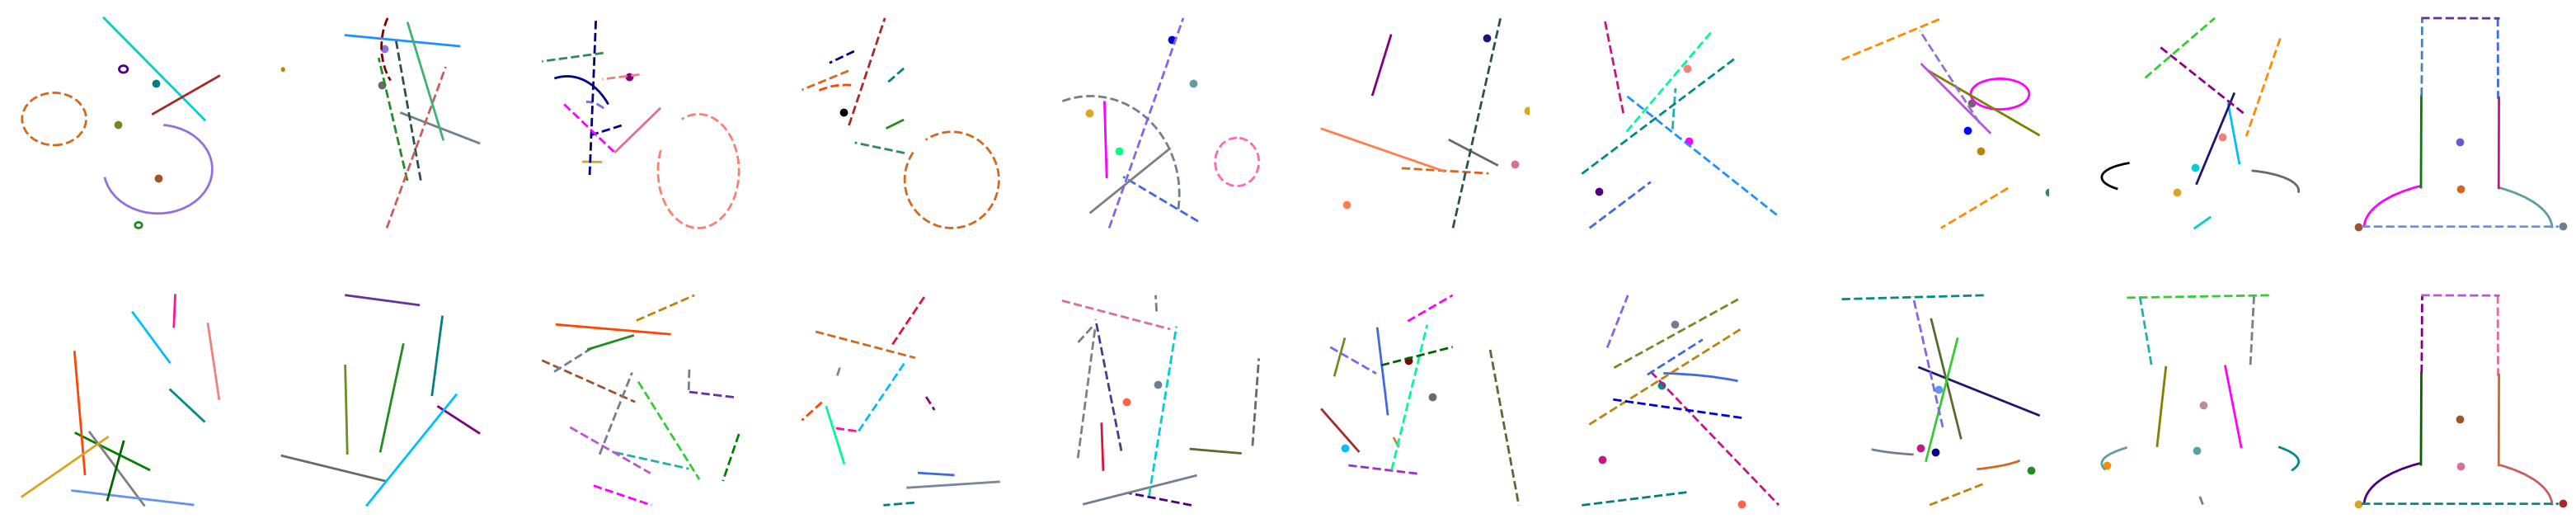

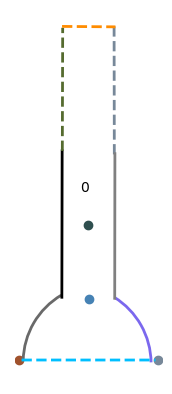

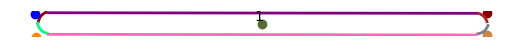

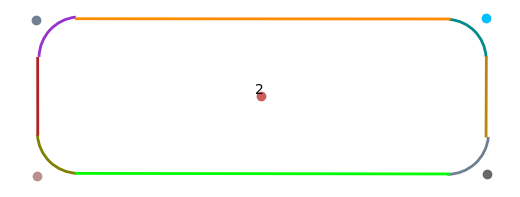

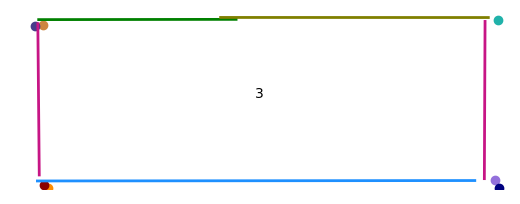

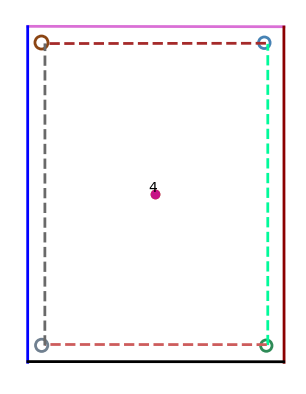

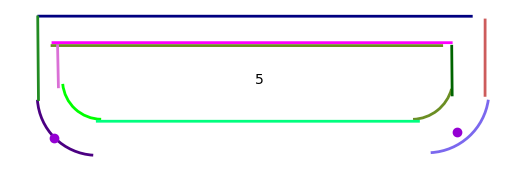

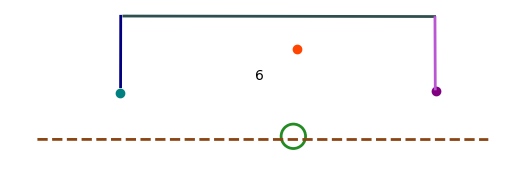

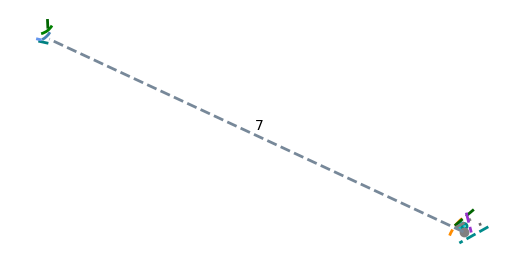

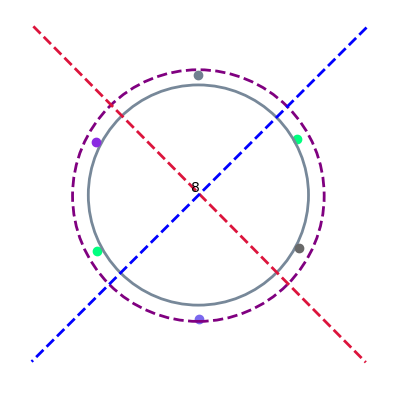

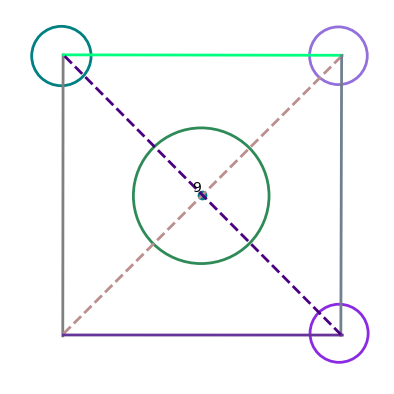

In [16]:
with torch.no_grad():
    # batch_size = 1
    # fig, axes = plt.subplots(nrows = 2, ncols = 10, figsize=(40, 8))
    # seed = model.noise_scheduler.sample_latent(batch_size).to(GPU)
    # sampled_nodes = model.denoise(seed, axes = axes)
    sampled_nodes = model.sample(10)

    for i in range(sampled_nodes.size(0)):
        fig = SketchDataset.render_graph(ToNaive(sampled_nodes[i,...,1:]).cpu(), torch.zeros(2,2,17))
        fig.text(0.5, 0.5, f"{i}")
        plt.show(fig)
        plt.close(fig)

In [17]:
base = 118

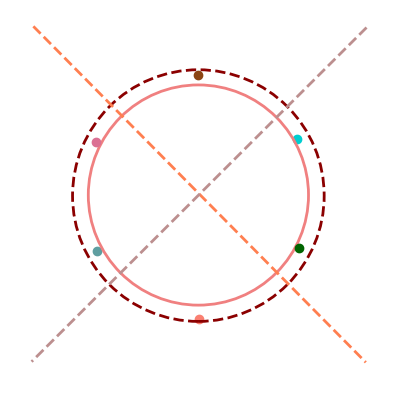

In [18]:
indexes = [8]
for index in indexes:
    fig = SketchDataset.render_graph(ToNaive(sampled_nodes[index,...,1:]).cpu(), torch.zeros(2,2,17))
    fig.savefig(f"icml_outputs/teaser{base}.pdf")
    base += 1

In [14]:
# with torch.no_grad():
#     frames = model.max_timestep
#     fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(4, 4))

#     curr_nodes = model.noise_scheduler.sample_latent(1)
#     curr_nodes = curr_nodes.to(model.device)

#     def animation_fun(frame : int, curr_nodes : Tensor, ax):
#         t = model.max_timestep - frame

#         batch_size = curr_nodes.size(0)
#         time = torch.ones(size = (batch_size,), dtype = torch.int32, device = model.device) * t
#         denoised_nodes = model(curr_nodes, time)
#         curr_nodes[...] = model.reverse(denoised_nodes, curr_nodes, t)
        
#         ax.cla()
#         SketchDataset.render_graph(ToNaive(curr_nodes[0,...,1:]).cpu(), torch.zeros(size = (2, 2, 17)).cpu(), ax)


#     animation = FuncAnimation(fig = fig, func = partial(animation_fun, curr_nodes = curr_nodes, ax = ax), frames = range(1, frames), interval = 17, repeat_delay = 1000)

#     FFwriter = matplotlib.animation.FFMpegWriter(fps=60)
#     animation.save('animation3.mp4', writer = FFwriter)
#     plt.close()